In [1]:
import pandas as pd
from itertools import combinations
import pathlib

In [2]:
DATA_PATH = pathlib.Path('data/')
paths = set(DATA_PATH.rglob('ir_ds*.pq'))
ds = None
for path in paths:
    ds = ds.append(pd.read_parquet(path),ignore_index=True) if ds is not None else pd.read_parquet(path)

In [3]:
ds.shape

(328570, 15)

In [4]:
ds['ir'] = ds.apply(lambda x: tuple(x['ir']),axis=1)
ds['opt']=ds.apply(lambda x: tuple(x['opt']),axis=1)
ds['build_options']=ds.apply(lambda x: tuple(x['build_options']),axis=1)

In [5]:
ds.columns

Index(['kernelName', 'globalSize', 'localSize', 'transferredBytes',
       'transferTimeNs', 'kernelTimeNs', 'build_options', 'ir', 'opt',
       'kernelname', 'hostname', 'deviceName', 'benchmarkSuite',
       'benchmarkName', 'datasetName'],
      dtype='object')

In [6]:
ds.kernelTimeNs = pd.to_numeric(ds.kernelTimeNs)
ds.globalSize = pd.to_numeric(ds.globalSize)
ds.localSize = pd.to_numeric(ds.localSize)
ds.transferredBytes = pd.to_numeric(ds.transferredBytes)
ds.transferTimeNs = pd.to_numeric(ds.transferTimeNs)

In [7]:
ds[['transferTimeNs','kernelTimeNs']].describe()

,transferTimeNs,kernelTimeNs
count,3.285700e+05,3.285700e+05
mean,4.356972e+07,4.514279e+06
std,1.001725e+07,4.299505e+07
min,2.857920e+05,4.601600e+04
25%,3.585482e+07,6.845760e+05
50%,4.310570e+07,1.451936e+06
75%,5.127329e+07,3.149000e+06
max,6.384512e+07,1.559924e+09


In [8]:
group = ds.groupby(['benchmarkName','datasetName','benchmarkSuite','opt'])

In [9]:
def get_std(grp):
    df = pd.DataFrame(columns=ds.columns)
    for g in grp:
        temp = g[1].iloc[0]
        temp.kernelTimeNs = g[1]['kernelTimeNs'].std()
        temp.transferTimeNs = g[1]['transferTimeNs'].std()
        temp.transferredBytes = g[1]['transferredBytes'].std()
#         return temp
        df = df.append(temp,ignore_index=True)
    return df

In [10]:
err_df = get_std(group)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
err_df.describe()[['transferTimeNs','kernelTimeNs']]

,transferTimeNs,kernelTimeNs
count,3.065100e+04,3.065100e+04
mean,9.117854e+04,3.141039e+04
std,6.253668e+04,2.943924e+05
min,2.036468e+02,0.000000e+00
25%,4.263936e+04,1.779827e+03
50%,9.544838e+04,8.068201e+03
75%,1.299483e+05,1.472449e+04
max,1.152517e+06,1.390468e+07


In [12]:
def get_mean(grp):
    df = pd.DataFrame(columns=ds.columns)
    for g in grp:
        temp = g[1].iloc[0]
        temp.kernelTimeNs = g[1]['kernelTimeNs'].mean()
        temp.transferTimeNs = g[1]['transferTimeNs'].mean()
        temp.transferredBytes = g[1]['transferredBytes'].mean()
#         return temp
        df = df.append(temp,ignore_index=True)
    return df

In [13]:
df = get_mean(group)
df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,kernelName,globalSize,localSize,transferredBytes,transferTimeNs,kernelTimeNs,build_options,ir,opt,kernelname,hostname,deviceName,benchmarkSuite,benchmarkName,datasetName
0,A,22115328,128,265383936.0,4.075714e+07,5.308286e+05,"(-I.,)","(-0.567818, 0.846908, 1.716297, 1.124501, -0.8...",(),A,tornado,Quadro GP100,clgen,00b2cd9176f8fd8ff41df5853ccc8ba77620d81f.21597K,default
1,A,22115328,128,265383936.0,4.078840e+07,5.293440e+05,"(-I.,)","(-0.567818, 0.846908, 1.716297, 1.124501, -0.8...","(--attributor,)",A,tornado,Quadro GP100,clgen,00b2cd9176f8fd8ff41df5853ccc8ba77620d81f.21597K,default
2,A,22115328,128,265383936.0,4.077028e+07,5.363552e+05,"(-I.,)","(-0.567818, 0.846908, 1.716297, 1.124501, -0.8...","(--attributor, --structurizecfg, --break-crit-...",A,tornado,Quadro GP100,clgen,00b2cd9176f8fd8ff41df5853ccc8ba77620d81f.21597K,default
3,A,22115328,128,265383936.0,4.064174e+07,5.342272e+05,"(-I.,)","(-0.567818, 0.846908, 1.716297, 1.124501, -0.8...","(--attributor-cgscc,)",A,tornado,Quadro GP100,clgen,00b2cd9176f8fd8ff41df5853ccc8ba77620d81f.21597K,default
4,A,22115328,128,265383936.0,4.067339e+07,5.288160e+05,"(-I.,)","(-0.567818, 0.846908, 1.716297, 1.124501, -0.8...","(--attributor-cgscc, --instnamer)",A,tornado,Quadro GP100,clgen,00b2cd9176f8fd8ff41df5853ccc8ba77620d81f.21597K,default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30738,A,21671936,32,260063232.0,3.996224e+07,1.029882e+06,"(-I.,)","(-0.348847, 0.915227, 1.825628, 1.322826, -0.6...","(--memprof,)",A,tornado,Quadro GP100,clgen,a65ec87aaee54b7b387de4a6660ab5738155551a.21164K,default
30739,A,21671936,32,260063232.0,3.992308e+07,1.020579e+06,"(-I.,)","(-0.348847, 0.915227, 1.825628, 1.322826, -0.6...","(--memprof, --break-crit-edges)",A,tornado,Quadro GP100,clgen,a65ec87aaee54b7b387de4a6660ab5738155551a.21164K,default
30740,A,21671936,32,260063232.0,3.994204e+07,1.889501e+06,"(-I.,)","(-0.348847, 0.915227, 1.825628, 1.322826, -0.6...","(--memprof, --instrorderfile)",A,tornado,Quadro GP100,clgen,a65ec87aaee54b7b387de4a6660ab5738155551a.21164K,default
30741,A,21671936,32,260063232.0,3.996216e+07,1.026250e+06,"(-I.,)","(-0.348847, 0.915227, 1.825628, 1.322826, -0.6...","(--memprof, --reg2mem, --instnamer)",A,tornado,Quadro GP100,clgen,a65ec87aaee54b7b387de4a6660ab5738155551a.21164K,default


In [14]:
datasize_performance = df[['kernelTimeNs','globalSize']].groupby('globalSize').mean()
xdata = datasize_performance.index.to_numpy(dtype=float)/(1024*1024)
ydata = datasize_performance.kernelTimeNs.to_numpy()

In [ ]:
plt.plot(xdata,ydata)
plt.xlabel("Workgroup Size(MB)")
plt.ylabel("Average kernel execution time(ns)")
plt.savefig('kerneltime-globalsize.png', dpi=1000)

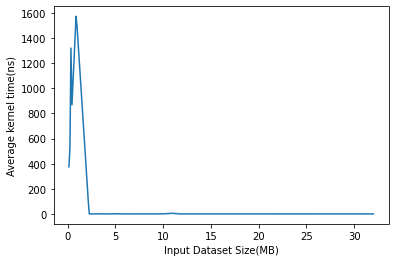

In [ ]:
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
import numpy as np
datasize_performance = df[['kernelTimeNs','globalSize']].groupby('globalSize').mean()
ydata = datasize_performance['kernelTimeNs'].to_numpy(dtype=float)/datasize_performance.index.to_numpy(dtype=float)
xdata = datasize_performance.index.to_numpy(dtype=float)/(1024*1024)
f = interp1d(xdata, ydata)

xnew = np.linspace(xdata.min(), xdata.max(), 300)  
y_smooth = f(xnew)
plt.plot(xnew,y_smooth)
plt.xlabel("Input Dataset Size(MB)")
plt.ylabel("Average kernel time(ns)")
plt.show()

In [22]:
group = df.groupby(['benchmarkName','datasetName','benchmarkSuite'])

In [20]:
def get_opt_data(grp):
    ind_df = pd.DataFrame(columns=['opt','speedup'])
    seq_df = pd.DataFrame(columns=['opt','speedup'])
    i=0
    j=0
    for g in grp:
        temp = g[1].loc[g[1]['opt']!=()]
        orgKernelTimeNs = g[1].loc[g[1]['opt']==()]['kernelTimeNs'].iloc[0]
        for index, row in temp.iterrows():
            speedup = -(row['kernelTimeNs'] - orgKernelTimeNs)/((orgKernelTimeNs + row['kernelTimeNs'])/2)            
            seq_df.loc[i] = [row['opt'],speedup]
            i+=1
            for opt in row['opt']:
                ind_df.loc[j]= [opt, speedup]
                j+=1
    return ind_df,seq_df

In [ ]:
ind_df,seq_df = get_opt_data(group)

In [ ]:
seq_df.sort_values('speedup',ascending = False)

,opt,speedup
2332,"(--memprof, --reg2mem)",0.103678
2334,"(--reg2mem,)",0.103642
2342,"(--scalarizer, --attributor)",0.103547
2338,"(--reg2mem, --memprof)",0.103341
2339,"(--reg2mem, --reg2mem)",0.103281
...,...,...
10911,"(--reg2mem, --instrorderfile, --gvn, --reg2mem...",-1.780593
7189,"(--reg2mem, --instrorderfile, --reg2mem, --ins...",-1.782306
3309,"(--instrorderfile, --instrorderfile, --lowerat...",-1.788056
9385,"(--reg2mem, --bdce, --instrorderfile, --gvn-ho...",-1.790252


In [ ]:
p = ind_df.groupby('opt').mean().sort_values('speedup',ascending = False)[:10]
p['speedup']=round(p.speedup*100,4)
p.mean()

speedup    0.85851
dtype: float64

In [ ]:
p

,speedup
opt,
--loop-versioning,0.021658
--loop-load-elim,0.019056
--loop-unroll,0.017078
--loop-flatten,0.008230
--loop-vectorize,0.006665
...,...
--separate-const-offset-from-gep,-0.891383
--infer-address-spaces,-0.940425
--instrorderfile,-0.993525


In [23]:
def get_pair_data(grp):
    df = pd.DataFrame(columns=['ir1','ir2','opt1','opt2','datasetName','globalSize','localSize','kernelTimeNs1','kernelTimeNs2','speedup','percent_speedup'])
    k=0
    for g in grp:
        temp = g[1]
        for comb in combinations(temp.index,2):
            first = temp.loc[comb[0]]
            second = temp.loc[comb[1]]
            speedup = second['kernelTimeNs'] - first['kernelTimeNs']
            avg = (first['kernelTimeNs'] + second['kernelTimeNs'])
            df.loc[k]=[first['ir'],second['ir'],first['opt'],second['opt'],first['datasetName'],float(first['globalSize']),float(first['localSize']),first['kernelTimeNs'], second['kernelTimeNs'],speedup,-speedup/avg]
            k+=1
    return df

In [24]:
d = get_pair_data(group)

In [25]:
# d['percent_speedup'] = (d['percent_speedup'] - d['percent_speedup'].min())/(d['percent_speedup'].max()-d['percent_speedup'].min())
d.percent_speedup.describe()

count    360183.000000
mean         -0.012093
std           0.332905
min          -0.902184
25%          -0.005036
50%           0.000009
75%           0.004556
max           0.902393
Name: percent_speedup, dtype: float64

In [26]:
final_df = d[['ir1','ir2','opt1','opt2',"globalSize","localSize","percent_speedup"]]

In [27]:
final_df["ir1"] = final_df.apply(lambda x:list(x["ir1"]),axis=1)
final_df["ir2"] = final_df.apply(lambda x:list(x["ir2"]),axis=1)
final_df["opt1"] = final_df.apply(lambda x:list(x["opt1"]),axis=1)
final_df["opt2"] = final_df.apply(lambda x:list(x["opt2"]),axis=1)

<ipython-input-27-017a10d62971>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["ir1"] = final_df.apply(lambda x:list(x["ir1"]),axis=1)


In [ ]:
final_df.to_parquet('dataset.pq')